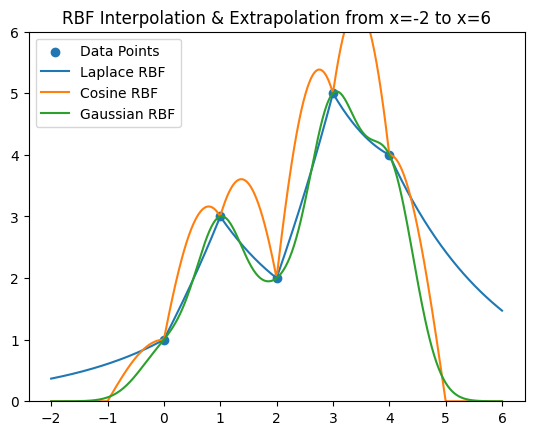

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) 예시 데이터 (5점)
# -----------------------------
x_data = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
y_data = np.array([1.0, 3.0, 2.0, 5.0, 4.0])
n = len(x_data)

# 커널 폭 (예시)
h = 1.0

# -----------------------------
# 2) 커널 함수들
# -----------------------------
def laplace_kernel(r, h):
    # K(r) = exp(-|r|/h)
    return np.exp(-0.5*np.abs(r)/h)

def cosine_kernel(r, h):
    # K(r) = (π/4) cos( (π r)/(2h) ), for |r|<h, else 0
    out = np.zeros_like(r)
    mask = np.abs(r) < h
    out[mask] = (np.pi/4.0)*np.cos((np.pi*r[mask])/(2.0*h))
    return out

def gaussian_kernel(r, h):
    # K(r) = exp( -r^2 / (2h^2) )
    return np.exp(-5*(r**2)/(2*(h**2)))

# -----------------------------
# 3) RBF 보간 (정확 보간)
# -----------------------------
def build_kernel_matrix(x_points, kernel_func, h):
    N = len(x_points)
    K = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            r = x_points[i] - x_points[j]
            K[i, j] = kernel_func(r, h)
    return K

def rbf_interpolation(x_eval, x_data, w, kernel_func, h):
    vals = []
    for x in x_eval:
        r = x - x_data
        kvals = kernel_func(r, h)
        vals.append(np.sum(w * kvals))
    return np.array(vals)

def do_exact_rbf_interpolation(x_data, y_data, kernel_func, h, x_eval):
    """
    1) K w = y 풀어서 w 구함
    2) f(x_eval) = sum_j [ w_j * K(x_eval - x_j) ]
    """
    K = build_kernel_matrix(x_data, kernel_func, h)
    w = np.linalg.solve(K, y_data)  # 정확 보간
    y_eval = rbf_interpolation(x_eval, x_data, w, kernel_func, h)
    return y_eval

# -----------------------------
# 4) [-2, 6] 범위로 확장해 Extrapolation
# -----------------------------
x_plot = np.linspace(-2, 6, 400)

y_laplace = do_exact_rbf_interpolation(x_data, y_data, laplace_kernel, h, x_plot)
y_cosine  = do_exact_rbf_interpolation(x_data, y_data, cosine_kernel, h, x_plot)
y_gauss   = do_exact_rbf_interpolation(x_data, y_data, gaussian_kernel, h, x_plot)

# -----------------------------
# 5) 하나의 그래프에 모두 그리기
# -----------------------------
plt.figure()
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_plot, y_laplace, label='Laplace RBF')
plt.plot(x_plot, y_cosine,  label='Cosine RBF')
plt.plot(x_plot, y_gauss,   label='Gaussian RBF')
plt.title('RBF Interpolation & Extrapolation from x=-2 to x=6')
plt.legend()
plt.ylim([0, 6])
plt.show()
